<a href="https://colab.research.google.com/github/PiyawatFrom/practices/blob/main/(Completed)%20HousePricesPrediction_fromKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price**

[House Prices - Advanced Regression Techniques (Kaggle)](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

[Pycarat Gitbook](https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation)

[Before this Version](https://colab.research.google.com/drive/1KQGImQiCRfu059w3Cva16_RG-l2jcSni#scrollTo=oC8wADNlykQi)

SalePrice is Target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = 'drive/MyDrive/Data Master Class/Week 4 ML 1 Supervised/Week 4 Dataset for homework/house-prices-advanced-regression-techniques/train.csv'
unseen_path = 'drive/MyDrive/Data Master Class/Week 4 ML 1 Supervised/Week 4 Dataset for homework/house-prices-advanced-regression-techniques/test.csv'

housePrices_train = pd.read_csv(train_path)
housePrices_unseen = pd.read_csv(unseen_path)

## **First look**

In [4]:
housePrices_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housePrices_train.shape

(1460, 81)

In [6]:
housePrices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housePrices_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
#ฟังก์ชันเช็คค่า null ทั้งหมดในแต่ละ column
def null_count(df):
    print('null count')
    print('-'*20)
    print(df.isnull().sum())
    print("-"*20)

    # how many total missing values do we have?
    total_cells = np.product(df.shape)
    total_missing = df.isnull().sum().sum()

    # percent of data that is missing
    percent_missing = (total_missing/total_cells) * 100
    print(f"missing = {total_missing} ({percent_missing:.3f}%)")
    print('')

    #heatmap fig
    display(sns.heatmap(df.isnull(), cbar=False))

In [9]:
#ฟังก์ชันเช็คว่าถ้า drop แถวที่มี Null ทั้งหมด จะสูญเสียไปเท่าไหร่
def if_dropAllRow(df):
    print("When drop all null row.")
    print('-'*25)
    columns_with_na_dropped = df.dropna(axis=0)

    # just how much data did we lose?
    print("Columns in original dataset: %d" % df.shape[0])
    print("Columns with na's dropped rows: %d" % columns_with_na_dropped.shape[0])
    Plost = ((df.shape[0]- columns_with_na_dropped.shape[0])/df.shape[0])*100
    print('lost =', round(Plost,3) , '%')

In [10]:
def first_analyze(df):
    analyze = pd.DataFrame({
                                "No. Unique" : df.nunique(),
                                "Missing" : df.isnull().sum(),
                                "Duplicated" : df.duplicated().sum()
                            })
    display(analyze.T)

In [11]:
# input is df and list of string
def show_statValue(df,see_list):
    display(df[see_list].describe().T.style.background_gradient(cmap='YlGn'))

In [12]:
first_analyze(housePrices_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
No. Unique,1460,15,5,110,1073,2,2,4,4,2,...,8,3,4,4,21,12,5,9,6,663
Missing,0,0,0,259,0,0,1369,0,0,0,...,0,1453,1179,1406,0,0,0,0,0,0
Duplicated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Data Preparation**

null count
--------------------
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
--------------------
missing = 6965 (5.890%)



<Axes: >

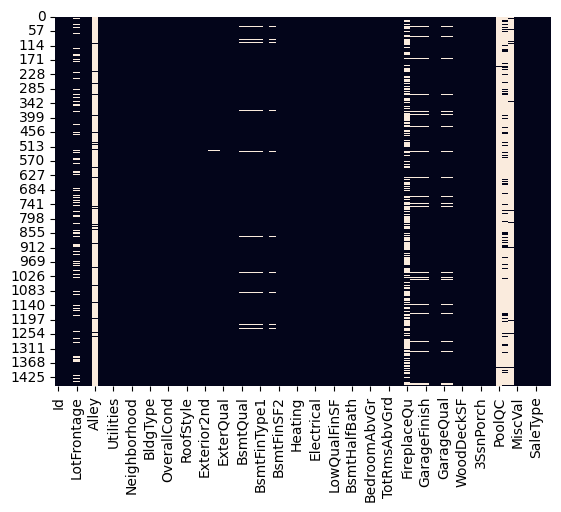

In [13]:
null_count(housePrices_train)

In [14]:
if_dropAllRow(housePrices_train)

When drop all null row.
-------------------------
Columns in original dataset: 1460
Columns with na's dropped rows: 0
lost = 100.0 %


In [15]:
# MSSubClass is catagory
# change to string col
housePrices_train['MSSubClass'] = housePrices_train['MSSubClass'].astype('str')
housePrices_unseen['MSSubClass'] = housePrices_train['MSSubClass'].astype('str')

In [16]:
# NA meaning is truly none

fill_with_none_cols = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                     'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual',
                     'GarageCond','PoolQC','Fence','MiscFeature']
def fill_none(df) :
    df[fill_with_none_cols].fillna('None', inplace=True)

In [17]:
ordinal_col_info = {'ExterQual':['Po','Fa','TA','Gd','Ex'] ,
                    'ExterCond':['Po','Fa','TA','Gd','Ex'],
                    'BsmtQual':['None','Po','Fa','TA','Gd','Ex'],
                    'BsmtCond':['None','Po','Fa','TA','Gd','Ex'],
                    'BsmtExposure':['None','No','Mn','Av','Gd'],
                    'BsmtFinType1':['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                    'BsmtFinType2':['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                    'HeatingQC':['Po','Fa','TA','Gd','Ex'],
                    'Electrical':['Mix','FuseP','FuseF','FuseA','SBrkr'],
                    'KitchenQual':['Po','Fa','TA','Gd','Ex'],
                    'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
                    'FireplaceQu':['None','Po','Fa','TA','Gd','Ex'],
                    'GarageFinish':['None','Unf','RFn','Fin'],
                    'GarageQual':['None','Po','Fa','TA','Gd','Ex'],
                    'GarageCond':['None','Po','Fa','TA','Gd','Ex'],
                    'PavedDrive':['N','P','Y'],
                    'PoolQC':['None','Fa','TA','Gd','Ex'],
                    'Fence':['None','MnWw','GdWo','MnPrv','GdPrv']}

ordinal_col = list(ordinal_col_info.keys())

In [18]:
ordinal_col

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence']

In [19]:
fill_none(housePrices_train)

<ipython-input-16-dd4a1ff2fb6c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fill_with_none_cols].fillna('None', inplace=True)


In [20]:
fill_none(housePrices_unseen)

<ipython-input-16-dd4a1ff2fb6c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fill_with_none_cols].fillna('None', inplace=True)


## **ML with Pycaret**

In [21]:
!pip install pycaret
!pip install --upgrade pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s eta 0:0

In [22]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

In [24]:
from pycaret.regression import *

In [25]:
sp = setup(data = housePrices_train , target = 'SalePrice' , ignore_features = 'Id' ,
           numeric_imputation = 'median', ordinal_features = ordinal_col_info , normalize = True ,
           transformation = True , transform_target = True , session_id = 11 )

,Description,Value
0,Session id,11
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 292)"
5,Transformed train set shape,"(1021, 292)"
6,Transformed test set shape,"(439, 292)"
7,Ignore features,2
8,Ordinal features,22
9,Numeric features,35


## **Compare models**

In [ ]:
find_best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1012,0.0243,0.1459,0.8851,0.0106,0.0080,2.9080
br,Bayesian Ridge,0.0943,0.0335,0.1551,0.8791,0.0109,0.0074,2.0820
omp,Orthogonal Matching Pursuit,0.0964,0.0328,0.1554,0.8755,0.0109,0.0076,2.7510
lightgbm,Light Gradient Boosting Machine,0.1063,0.0266,0.1536,0.8702,0.0113,0.0084,4.7800
huber,Huber Regressor,0.0941,0.0367,0.1602,0.8702,0.0112,0.0074,2.2720
ridge,Ridge Regression,0.0969,0.0368,0.1622,0.8665,0.0113,0.0076,2.2290
xgboost,Extreme Gradient Boosting,0.1122,0.0272,0.1566,0.8660,0.0115,0.0088,2.6120
et,Extra Trees Regressor,0.1117,0.0290,0.1609,0.8560,0.0118,0.0088,4.4200
rf,Random Forest Regressor,0.1115,0.0300,0.1631,0.8539,0.0119,0.0088,4.1550
par,Passive Aggressive Regressor,0.1171,0.0436,0.1862,0.8177,0.0132,0.0093,2.0550


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(find_best)

GradientBoostingRegressor(random_state=11)


## **Made sep models**

In [26]:
# Gradient Boosting Regressor
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1758,0.0726,0.2695,0.8989,0.0152,0.0106
1,0.1058,0.0227,0.1507,0.8012,0.0115,0.0088
2,0.0561,0.0064,0.0801,0.9161,0.0075,0.0057
3,0.0489,0.0044,0.0664,0.9007,0.0070,0.0056
4,0.0929,0.0174,0.1319,0.9137,0.0093,0.0071
5,0.0956,0.0156,0.1250,0.9258,0.0084,0.0069
6,0.1044,0.0257,0.1604,0.8688,0.0129,0.0089
7,0.1232,0.0311,0.1763,0.8715,0.0127,0.0095
8,0.0834,0.0124,0.1113,0.9240,0.0086,0.0070


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
# Bayesian Ridge
br_model = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1805,0.1846,0.4297,0.7429,0.0228,0.0109
1,0.0881,0.0265,0.1629,0.7675,0.0121,0.0073
2,0.0550,0.0068,0.0826,0.9107,0.0078,0.0056
3,0.0411,0.0036,0.0604,0.9178,0.0063,0.0047
4,0.0959,0.0187,0.1366,0.9074,0.0096,0.0073
5,0.1008,0.0160,0.1264,0.9241,0.0086,0.0073
6,0.0926,0.0193,0.1389,0.9016,0.0112,0.0079
7,0.1085,0.0251,0.1583,0.8964,0.0115,0.0084
8,0.0729,0.0105,0.1027,0.9353,0.0079,0.0061


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
# Orthogonal Matching Pursuit
omp_model = create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1794,0.1709,0.4134,0.7620,0.0219,0.0108
1,0.0965,0.0331,0.1820,0.7098,0.0135,0.0080
2,0.0508,0.0057,0.0754,0.9256,0.0071,0.0052
3,0.0461,0.0036,0.0597,0.9198,0.0062,0.0053
4,0.1001,0.0190,0.1378,0.9058,0.0098,0.0077
5,0.0978,0.0153,0.1235,0.9275,0.0084,0.0071
6,0.1016,0.0246,0.1568,0.8745,0.0127,0.0087
7,0.1055,0.0226,0.1504,0.9065,0.0109,0.0082
8,0.0773,0.0113,0.1063,0.9307,0.0083,0.0065


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
# Light Gradient Boosting Machine
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1831,0.0796,0.2821,0.8892,0.0159,0.0110
1,0.1079,0.0244,0.1563,0.7860,0.0119,0.0089
2,0.0619,0.0080,0.0895,0.8950,0.0084,0.0063
3,0.0531,0.0070,0.0840,0.8413,0.0089,0.0062
4,0.0957,0.0182,0.1350,0.9095,0.0095,0.0073
5,0.0988,0.0167,0.1291,0.9208,0.0087,0.0071
6,0.1059,0.0267,0.1635,0.8636,0.0132,0.0090
7,0.1419,0.0391,0.1978,0.8383,0.0142,0.0109
8,0.0899,0.0155,0.1245,0.9049,0.0096,0.0076


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
# Huber Regressor
huber_model = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1813,0.2094,0.4576,0.7085,0.0241,0.0109
1,0.0977,0.0312,0.1765,0.7270,0.0132,0.0081
2,0.0569,0.0066,0.0815,0.9130,0.0077,0.0058
3,0.0426,0.0038,0.0620,0.9136,0.0065,0.0049
4,0.0927,0.0178,0.1334,0.9116,0.0095,0.0071
5,0.0975,0.0165,0.1286,0.9214,0.0088,0.0071
6,0.0914,0.0193,0.1390,0.9015,0.0112,0.0078
7,0.1040,0.0258,0.1607,0.8932,0.0117,0.0081
8,0.0721,0.0104,0.1019,0.9363,0.0079,0.0060


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## **Tune models**

In [31]:
tuned_gbr = tune_model(gbr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1793,0.0885,0.2975,0.8767,0.0166,0.0108
1,0.0959,0.0271,0.1647,0.7622,0.0123,0.0079
2,0.0583,0.0072,0.0850,0.9053,0.0080,0.0060
3,0.0488,0.0048,0.0696,0.8911,0.0073,0.0056
4,0.0939,0.0168,0.1297,0.9165,0.0092,0.0072
5,0.0936,0.0157,0.1251,0.9256,0.0084,0.0068
6,0.0979,0.0237,0.1539,0.8792,0.0124,0.0084
7,0.1269,0.0350,0.1872,0.8551,0.0135,0.0098
8,0.0770,0.0111,0.1053,0.9320,0.0081,0.0064


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
tuned_br = tune_model(br_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1804,0.1872,0.4327,0.7393,0.0230,0.0109
1,0.0895,0.0277,0.1666,0.7569,0.0124,0.0074
2,0.0561,0.0068,0.0824,0.9111,0.0078,0.0058
3,0.0414,0.0039,0.0625,0.9121,0.0065,0.0048
4,0.0962,0.0187,0.1367,0.9072,0.0097,0.0073
5,0.1026,0.0167,0.1292,0.9208,0.0088,0.0074
6,0.0931,0.0194,0.1395,0.9008,0.0113,0.0080
7,0.1089,0.0255,0.1595,0.8948,0.0116,0.0084
8,0.0719,0.0103,0.1013,0.9370,0.0078,0.0060


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [33]:
tuned_omp = tune_model(omp_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1782,0.1764,0.4200,0.7543,0.0222,0.0107
1,0.0983,0.0335,0.1829,0.7069,0.0136,0.0082
2,0.0544,0.0059,0.0770,0.9223,0.0072,0.0056
3,0.0471,0.0037,0.0611,0.9158,0.0063,0.0054
4,0.1011,0.0187,0.1369,0.9069,0.0097,0.0077
5,0.1015,0.0192,0.1386,0.9087,0.0096,0.0074
6,0.0996,0.0241,0.1553,0.8769,0.0126,0.0085
7,0.1102,0.0241,0.1551,0.9006,0.0112,0.0085
8,0.0809,0.0129,0.1134,0.9211,0.0089,0.0068


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
tuned_lightgbm = tune_model(lightgbm_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2019,0.0872,0.2952,0.8786,0.0165,0.0121
1,0.1283,0.0299,0.1730,0.7379,0.0132,0.0106
2,0.0843,0.0148,0.1216,0.8064,0.0115,0.0087
3,0.0633,0.0111,0.1052,0.7510,0.0112,0.0074
4,0.1325,0.0291,0.1706,0.8556,0.0120,0.0101
5,0.1308,0.0271,0.1647,0.8712,0.0111,0.0095
6,0.1210,0.0342,0.1849,0.8255,0.0148,0.0103
7,0.1472,0.0398,0.1995,0.8355,0.0143,0.0113
8,0.1146,0.0252,0.1587,0.8456,0.0124,0.0096


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
tuned_huber = tune_model(huber_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1777,0.1973,0.4442,0.7252,0.0235,0.0107
1,0.0981,0.0310,0.1762,0.7280,0.0132,0.0082
2,0.0559,0.0064,0.0803,0.9157,0.0076,0.0057
3,0.0421,0.0037,0.0610,0.9162,0.0064,0.0049
4,0.0931,0.0179,0.1340,0.9109,0.0095,0.0071
5,0.1022,0.0184,0.1355,0.9128,0.0092,0.0074
6,0.0915,0.0189,0.1376,0.9033,0.0111,0.0078
7,0.1058,0.0270,0.1643,0.8884,0.0119,0.0082
8,0.0695,0.0095,0.0972,0.9420,0.0075,0.0058


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


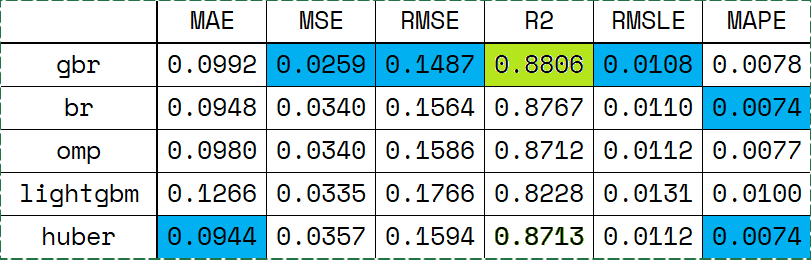

In [39]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## **Final models**

In [36]:
final_gbr_model = finalize_model(tuned_gbr)

In [37]:
print(final_gbr_model)

Pipeline(memory=Memory(location=None),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['LotFrontage', 'LotArea',
                                             'OverallQual', 'OverallCond',
                                             'YearBuilt', 'YearRemodAdd',
                                             'MasVnrArea', 'BsmtFinSF1',
                                             'BsmtFinSF2', 'Bsm...
                                                                    'BsmtFinType2',
                                                                    'Heating',
                                                                    'HeatingQC',
                                                                    'Electrical',
                                                                    

In [38]:
hp_predicted = predict_model(final_gbr_model , data = housePrices_unseen)
hp_predicted.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction_label
0,1461,60,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,122194.217873
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,152279.318231
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,180924.150921
3,1464,70,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,181188.620679
4,1465,60,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,192009.767777


In [41]:
hp_submission = hp_predicted[['Id','prediction_label']]
hp_submission.head()

,Id,prediction_label
0,1461,122194.217873
1,1462,152279.318231
2,1463,180924.150921
3,1464,181188.620679
4,1465,192009.767777


In [42]:
# from google.colab import files

# # Export the DataFrame to a CSV file without index
# file_path = '/content/mySubmission_v4.csv'
# hp_submission.to_csv(file_path, index=False)

# print('CSV file saved successfully.')

# # Download the CSV file
# files.download(file_path)

CSV file saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>